In [1]:
import numpy as np
import pandas as pd
import re
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
# Sean Gelacio and Anvin Thomas
# skg99 and apt69
gglfile = "GooglePlaystore.xlsx"
ggls = pd.read_excel(gglfile)
ggls

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


In [3]:
# Preprocessing 1-4
ggls = ggls[ggls['Reviews'] != '3.0M']
ggls = ggls[ggls.apply(lambda row: 'Varies with device' not in row.values, axis=1)]
def renamv(ver):
    ver = str(ver)
    if ver == 'nan':
        return ver
    ver_temp = re.sub(r'[^0-9.]', '',ver)
    ver_temp = ver_temp.split(".")
    fin_ver = float(".".join(ver_temp[:2]))
    return fin_ver
ggls['Android Ver'] = ggls['Android Ver'].apply(renamv)
def chngin(inst):
    inst = inst.replace(',', '').replace('+', '')
    try:
        fin_inst = int(inst)
    except:
        return None
    return fin_inst
ggls['Installs'] = ggls['Installs'].apply(chngin)
ggls


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


In [4]:
# Preprocessing 5
ggls = ggls[(ggls['Reviews'].astype(int) >= 100) | (ggls['Installs'] >= 50000)] 
avg_rating = ggls.groupby('Category')['Rating'].mean()
def fill(row):
    if pd.isnull(row['Rating']):
        return round(avg_rating[row['Category']], 2)
    else:
        return row['Rating']
ggls.loc[:, 'Rating'] = ggls.apply(fill, axis=1)
ggls

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,5000,Free,0,Everyone,Education,2018-06-13 00:00:00,2.0.20,4.0
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,10000,Free,0,Everyone,Comics,2017-05-15 00:00:00,2.0.1,4.0
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,10000,Free,0,Everyone,Books & Reference,2016-06-19 00:00:00,2.96,4.1
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,100000,Free,0,Everyone,News & Magazines,2014-01-20 00:00:00,1.5,1.6


In [5]:
# Preprocessing 6
def preproc_size(size):
    if 'M' in size:
        return int(float(size.replace('M', '')) * 1000000)
    elif 'K' in size:
        return int(float(size.replace('K', '')) * 1000)
    elif 'm' in size:
        return int(float(size.replace('m', '')) * 1000000)
    elif 'k' in size:
        return int(float(size.replace('k', '')) * 1000)
    else:
        return size
ggls.loc[:, 'Size'] = ggls['Size'].apply(preproc_size)
ggls

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13000000,5000,Free,0,Everyone,Education,2018-06-13 00:00:00,2.0.20,4.0
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13000000,10000,Free,0,Everyone,Comics,2017-05-15 00:00:00,2.0.1,4.0
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7400000,10000,Free,0,Everyone,Books & Reference,2016-06-19 00:00:00,2.96,4.1
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2300000,100000,Free,0,Everyone,News & Magazines,2014-01-20 00:00:00,1.5,1.6


In [6]:
# Analysis 1
ggls.describe()

,Rating,Installs
count,5822.000000,5.822000e+03
mean,4.196989,1.071124e+07
std,0.430216,5.634807e+07
min,1.600000,5.000000e+02
25%,4.000000,1.000000e+05
50%,4.300000,1.000000e+06
75%,4.500000,5.000000e+06
max,5.000000,1.000000e+09


In [7]:
# Analysis 2
free = ggls[ggls['Type'] == 'Free']
def top3(col):
    topapps = []
    for cat in free['Category'].unique():
        catapps = free[free['Category'] == cat]
        catapps.loc[:, col] = pd.to_numeric(catapps[col], errors='coerce')
        sortapps = catapps.sort_values(by=col, ascending=False).head(3)
        for index, row in sortapps.iterrows():
            topapps.append({'Category': row['Category'], 'App': row['App'], col: row[col]})
    return pd.DataFrame(topapps)

toprating = top3('Rating')
topinstalls = top3('Installs')
topreviews = top3('Reviews')
toprating


,Category,App,Rating
0,ART_AND_DESIGN,Cardi B Wallpaper,4.8
1,ART_AND_DESIGN,Harley Quinn wallpapers HD,4.8
2,ART_AND_DESIGN,Photo Designer - Write your name with shapes,4.7
3,AUTO_AND_VEHICLES,Tickets SDA 2018 and Exam from the State Traff...,4.9
4,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,4.9
...,...,...,...
94,NEWS_AND_MAGAZINES,أحداث وحقائق | خبر عاجل في اخبار العالم,4.8
95,NEWS_AND_MAGAZINES,The Guardian,4.7
96,MAPS_AND_NAVIGATION,GPS Speedometer and Odometer,4.8
97,MAPS_AND_NAVIGATION,PlugShare,4.7


In [8]:
# Analysis 2 part b
topinstalls

,Category,App,Installs
0,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",10000000
1,ART_AND_DESIGN,ibis Paint X,10000000
2,ART_AND_DESIGN,Tattoo Name On My Photo Editor,10000000
3,AUTO_AND_VEHICLES,AutoScout24 - used car finder,10000000
4,AUTO_AND_VEHICLES,Fines of the State Traffic Safety Inspectorate...,5000000
...,...,...,...
94,NEWS_AND_MAGAZINES,Google News,1000000000
95,NEWS_AND_MAGAZINES,Google News,1000000000
96,MAPS_AND_NAVIGATION,GPS Navigation & Offline Maps Sygic,50000000
97,MAPS_AND_NAVIGATION,"Yahoo! transit guide free timetable, operation...",10000000


In [9]:
# Analysis 2 part c
topreviews

,Category,App,Reviews
0,ART_AND_DESIGN,ibis Paint X,224399
1,ART_AND_DESIGN,FlipaClip - Cartoon animation,194216
2,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",174531
3,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,197136
4,AUTO_AND_VEHICLES,AutoScout24 - used car finder,186648
...,...,...,...
94,NEWS_AND_MAGAZINES,Google News,877643
95,NEWS_AND_MAGAZINES,Google News,877635
96,MAPS_AND_NAVIGATION,GPS Navigation & Offline Maps Sygic,1421884
97,MAPS_AND_NAVIGATION,Grab Driver,301413


In [10]:
# Analysis 3
ggls.loc[:, 'Price'] = ggls['Price'].astype(str)
ggls.loc[:, 'Price'] = ggls['Price'].str.replace(r'[^\d.]', '', regex=True)
ggls.loc[:, 'Price'] = pd.to_numeric(ggls['Price'], errors='coerce')

paid = ggls[ggls['Type'] == 'Paid']

avg_price = paid['Price'].mean()
max_price = paid['Price'].max()
min_price = paid['Price'].min()

print(f'Average price of paid applications: ${round(avg_price,2)}')
print(f'Maximum price of paid applications: ${max_price}')
print(f'Minimum price of paid applications: ${min_price}')


Average price of paid applications: $17.42
Maximum price of paid applications: $400.0
Minimum price of paid applications: $0.99


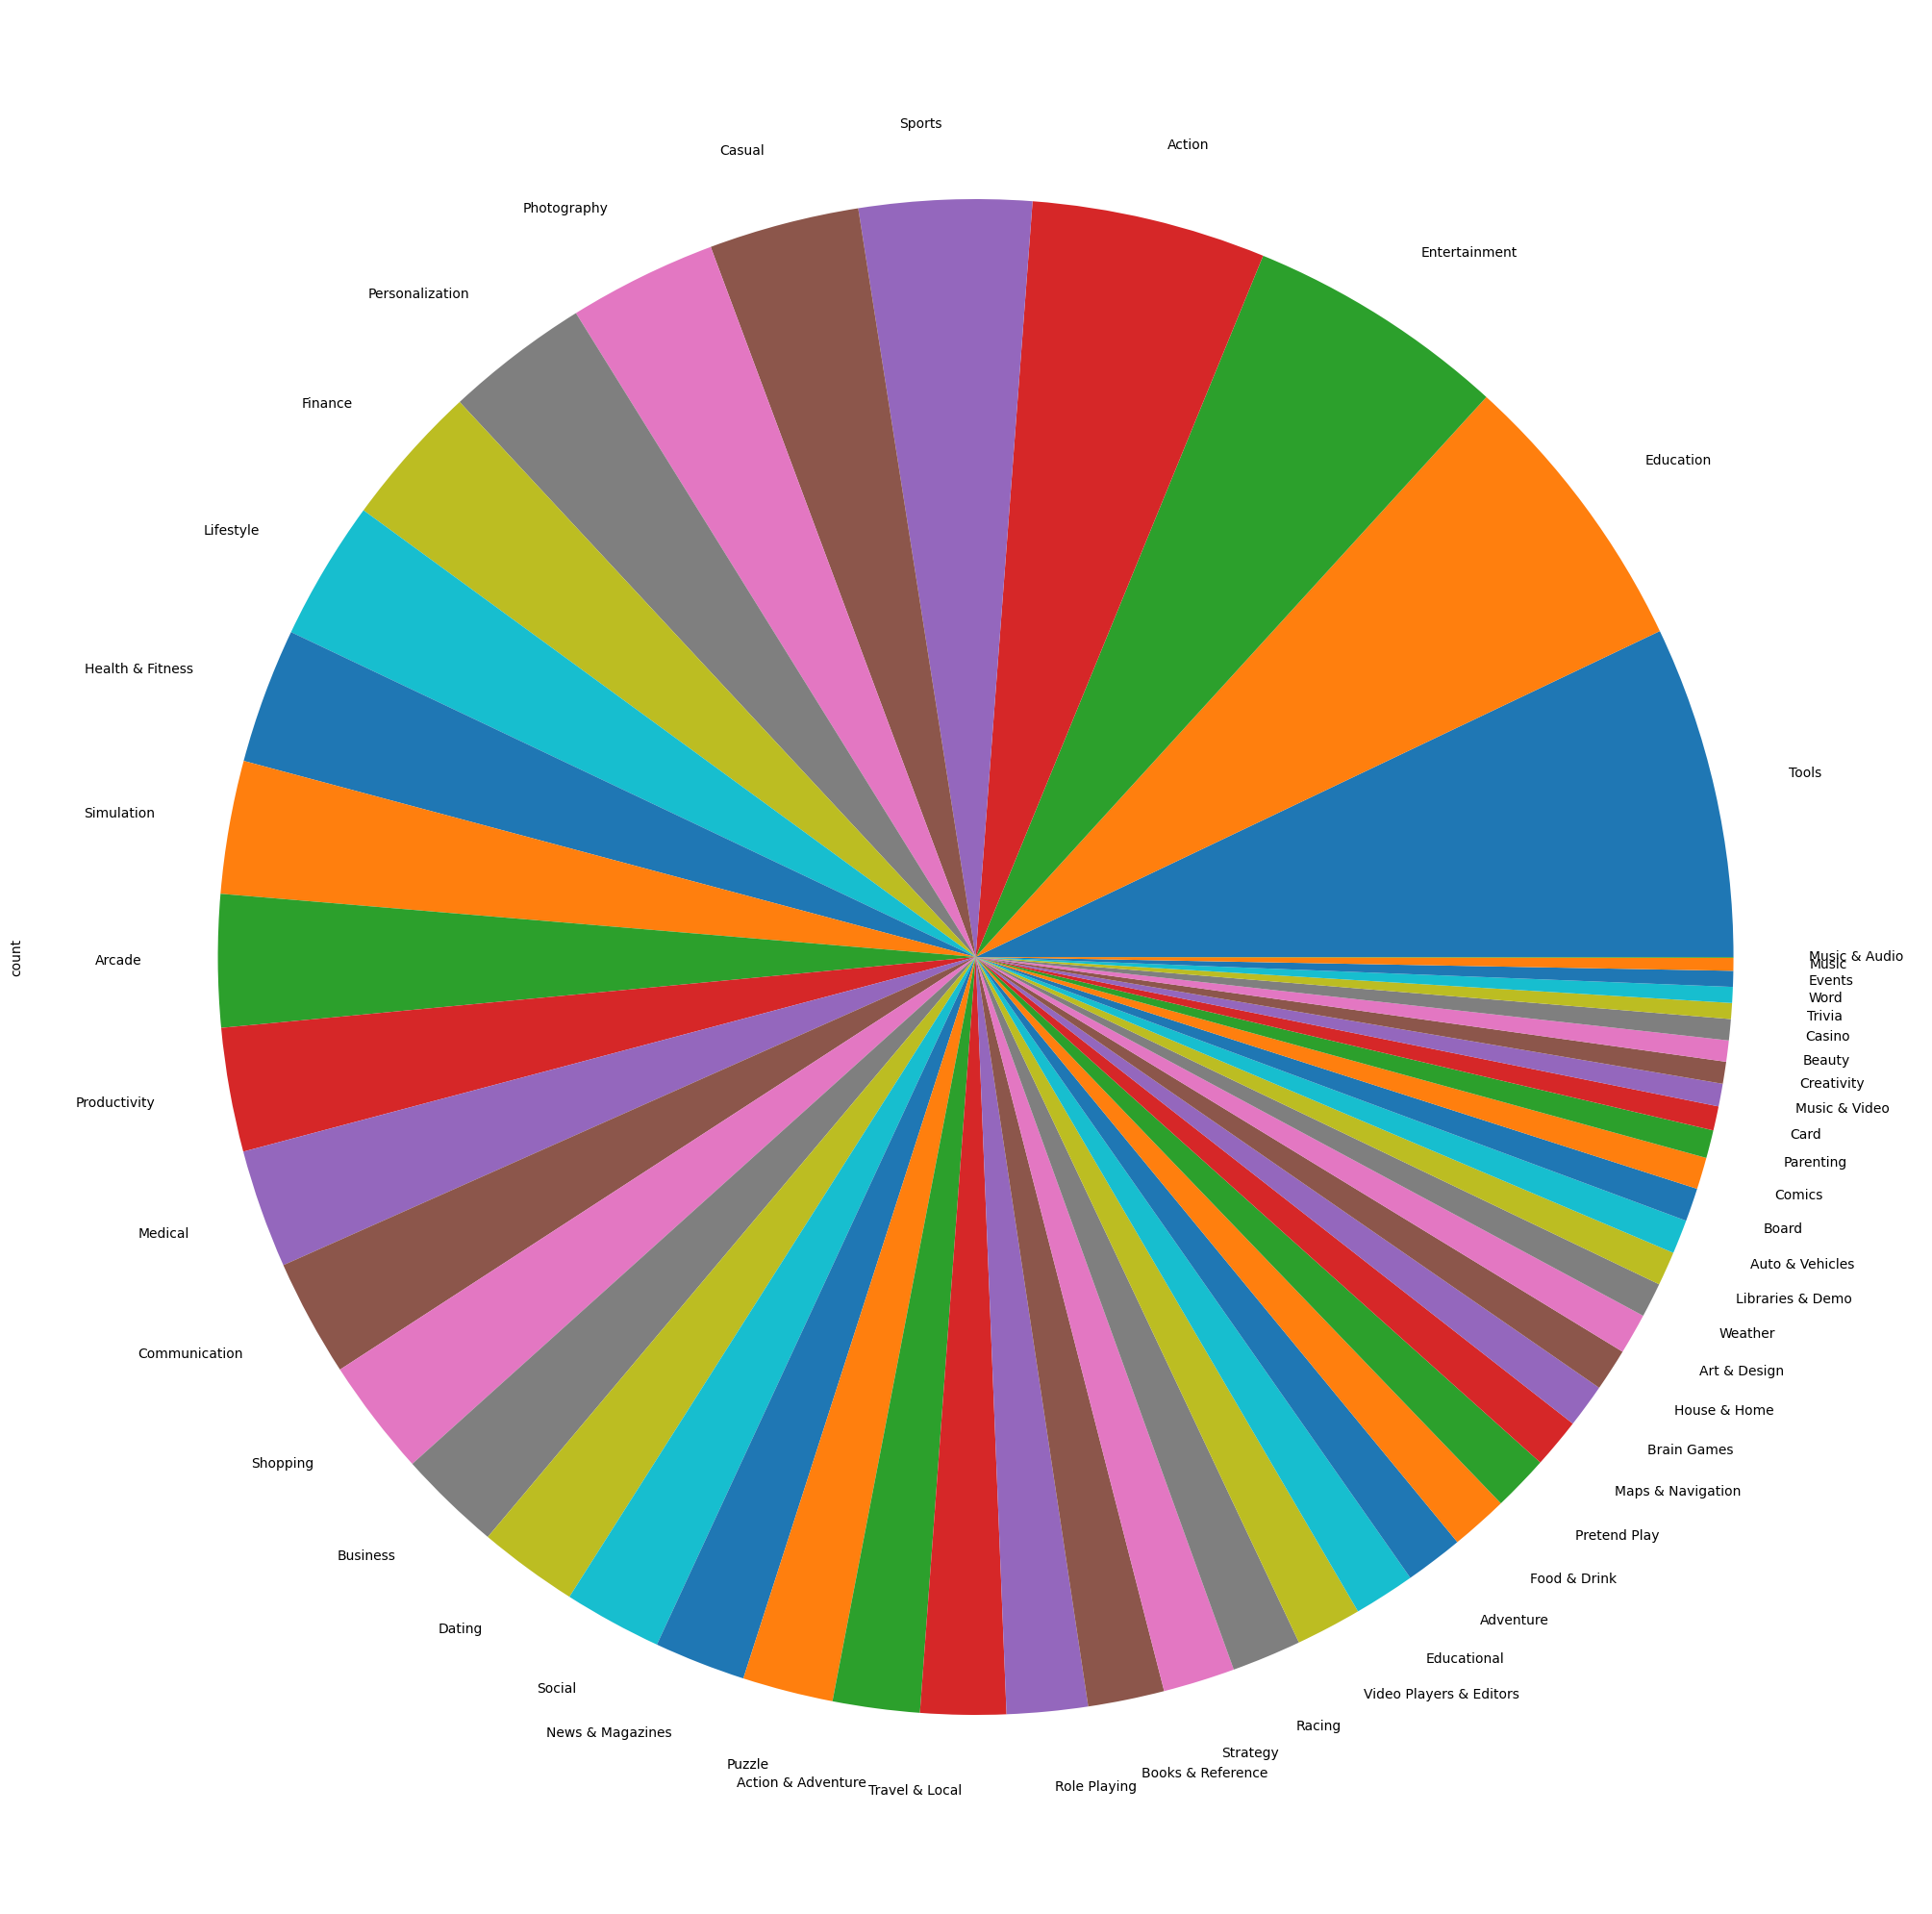

In [11]:
# Visualization 1
ggls.loc[:, 'Genres'] = ggls['Genres'].str.split(';')
exploded = ggls.explode('Genres')
gencount = exploded['Genres'].value_counts()

plt.figure(figsize=(40, 20))
gencount.plot(kind='pie')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

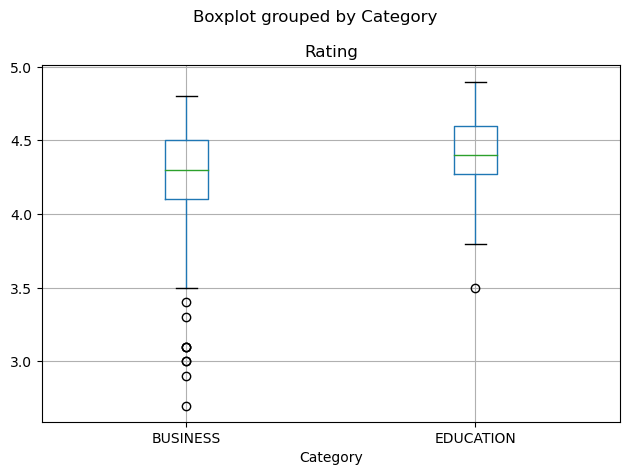

In [12]:
# Visualization 2
bus_edplot = ggls[ggls['Category'].isin(['BUSINESS', 'EDUCATION'])]
plt.figure(figsize=(10, 5))
bus_edplot.boxplot(column='Rating', by='Category')
plt.tight_layout()
plt.show()